In [20]:
import os
import sys
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
# Add backend/voice_api to Python path
ROOT_DIR = os.path.abspath(
    os.path.join(os.getcwd(), "../../../backend/voice_api")
)

sys.path.insert(0, ROOT_DIR)

from utils.feature_extractor import extract_features

print("Feature extractor imported successfully ✅")


Feature extractor imported successfully ✅


In [22]:
DATASET_DIR = os.path.abspath(".")
FEMALE_DIR = os.path.join(DATASET_DIR, "female")
MALE_DIR = os.path.join(DATASET_DIR, "male")

print("Female folder:", FEMALE_DIR)
print("Male folder:", MALE_DIR)


Female folder: C:\Users\maduw\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\Dataset\voice\gender_voice\female
Male folder: C:\Users\maduw\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\Dataset\voice\gender_voice\male


In [23]:
X = []
y = []

def load_voice_data(folder, label):
    count = 0
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            file_path = os.path.join(folder, file)
            features = extract_features(file_path)

            if features is not None:
                X.append(features)
                y.append(label)
                count += 1
    print(f"Loaded {count} samples from {folder}")

# 0 = Female, 1 = Male
load_voice_data(FEMALE_DIR, 0)
load_voice_data(MALE_DIR, 1)

X = np.array(X)
y = np.array(y)

print("Total samples:", X.shape[0])
print("Feature vector size:", X.shape[1])


Loaded 5767 samples from C:\Users\maduw\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\Dataset\voice\gender_voice\female
Loaded 10376 samples from C:\Users\maduw\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\Dataset\voice\gender_voice\male
Total samples: 16143
Feature vector size: 28


Class distribution:
{'Female': np.int64(5767), 'Male': np.int64(10376)}


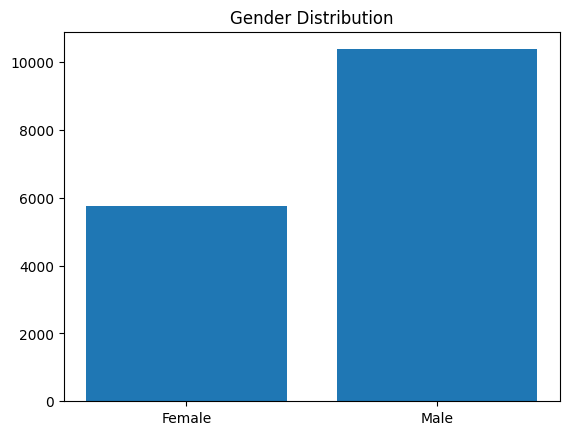

In [24]:
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:")
print(dict(zip(["Female", "Male"], counts)))

plt.bar(["Female", "Male"], counts)
plt.title("Gender Distribution")
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 12914
Testing samples: 3229


In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed ✅")


Feature scaling completed ✅


In [27]:
svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    probability=True
)

print("Training SVM model...")
svm_model.fit(X_train_scaled, y_train)
print("SVM training completed ✅")

Training SVM model...
SVM training completed ✅


In [28]:
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Female", "Male"]))


Accuracy: 0.9984515329823475

Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1154
        Male       1.00      1.00      1.00      2075

    accuracy                           1.00      3229
   macro avg       1.00      1.00      1.00      3229
weighted avg       1.00      1.00      1.00      3229



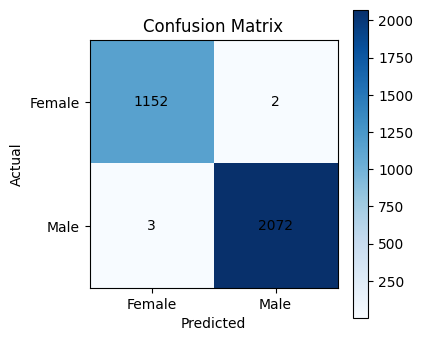

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Female", "Male"])
plt.yticks([0,1], ["Female", "Male"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
SAVE_DIR = os.path.abspath(
    os.path.join(DATASET_DIR, "../../../backend/voice_api/model")
)

os.makedirs(SAVE_DIR, exist_ok=True)

joblib.dump(svm_model, os.path.join(SAVE_DIR, "gender_svm_model.pkl"))
joblib.dump(scaler, os.path.join(SAVE_DIR, "gender_scaler.pkl"))

print("✅ Gender SVM model saved at:", SAVE_DIR)


✅ Gender SVM model saved at: C:\Users\maduw\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\backend\voice_api\model


In [31]:
test_file = os.path.join(FEMALE_DIR, os.listdir(FEMALE_DIR)[0])
features = extract_features(test_file)

features_scaled = scaler.transform([features])
prediction = svm_model.predict(features_scaled)[0]
prob = svm_model.predict_proba(features_scaled)

print("Prediction:", "Female" if prediction == 0 else "Male")
print("Confidence:", prob)


Prediction: Female
Confidence: [[9.99977071e-01 2.29288324e-05]]
